Step 1 convert fits to csv

In [1]:
import numpy
import sys
from astropy.io import fits

def write_nparr_to_csv(data, filename, delimiter):
    # Ajout d'une colonne vide à droite
    empty_column = numpy.full((data.shape[0], 1), numpy.nan)  # Colonne remplie de NaN
    data = numpy.hstack((data, empty_column))

    # Écriture dans le fichier CSV/TSV
    numpy.savetxt(filename, data, delimiter=delimiter, fmt='%s')

# Lecture du fichier FITS
gt_name = "SGRA_full_gt.fits"
gt_hdu = fits.open(gt_name)[0]
data = gt_hdu.data

# Si le tableau a plus de 2 dimensions, sélectionne la première tranche
if data.ndim > 2:
    data = data[0, 0, :, :]

# Réinversion du tableau (inversion des axes)
result = numpy.flip(data)

# Écriture dans le fichier CSV/TSV
IMAGE = "dataflow/image.csv"
write_nparr_to_csv(result, IMAGE, ",")
print("Fichier sauvegarder dans : "+IMAGE)


Fichier sauvegarder dans : dataflow/image.csv


Step2 run the dataflow executable

In [3]:
import os
import subprocess

# Chemin vers le dossier dataflow
dataflow_directory = "dataflow"

# Vérifie si on est déjà dans le bon dossier
current_directory = os.getcwd()
if not current_directory.endswith(dataflow_directory):
    print(f"Le répertoire actuel est {current_directory}. Changement vers {dataflow_directory}...")
    os.chdir(dataflow_directory)
else:
    print(f"On est déjà dans le répertoire {dataflow_directory}.")

EXECUTABLE = "./STD_DEGRID"

print(f"Lancement : {EXECUTABLE}")
result = subprocess.run(EXECUTABLE, capture_output=True, text=True)
print(result.stdout)
if result.stderr:
    print(f"Erreur :\n{result.stderr}")
    
os.chdir("..")
print(os.getcwd())

On est déjà dans le répertoire dataflow.
Lancement : ./STD_DEGRID
UPDATE >>> Image loaded from image.csv
UPDATE >>> Image converted to grid (input_grid) successfully
UPDATE >>> Loading degridding kernel support file from config/wproj_manualconj_degridding_kernel_supports_x16.csv...

UPDATE >>> Total number of samples needed to store degridding kernels is -2147483648...

UPDATE >>> Loading kernel files file from config/wproj_manualconj_degridding_kernels_real_x16.csv real and config/wproj_manualconj_degridding_kernels_imag_x16.csv imaginary...

Degridding visibilities using FFT degridder
UPDATE >>> Image degridded successfully

/home/orenaud/Documents/GITHUB/VIS/vis-generator


step 3 convertir les 2 fichier en .fits

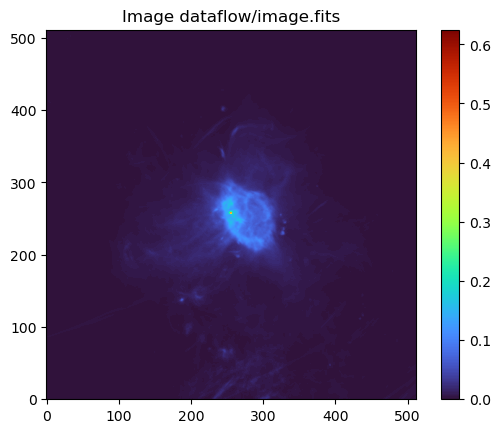

In [4]:
import numpy
import sys
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt

def write_nparr_to_fits(data, filename):
    hdu = fits.PrimaryHDU(data)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(filename, overwrite=True)
    hdulist.close()

def display_fits_image(fits_file):
    # Charger les données du fichier FITS
    hdulist = fits.open(fits_file)
    data = hdulist[0].data  # Les données de l'image sont dans la première extension
    hdulist.close()

    # Affichage de l'image avec matplotlib
    plt.imshow(data, cmap='turbo', origin='lower')
    plt.colorbar()  # Ajoute une barre de couleur pour l'échelle des intensités
    plt.title(f"Image {fits_file}")
    plt.show()

IMAGE = "dataflow/image.csv"
FITS = "dataflow/image.fits"
delimiter = ","

result = numpy.genfromtxt(IMAGE, delimiter=delimiter)[:,:-1]  # Ignorer la dernière colonne si nécessaireresult = numpy.flip(result)

write_nparr_to_fits(result, FITS)
display_fits_image(FITS)

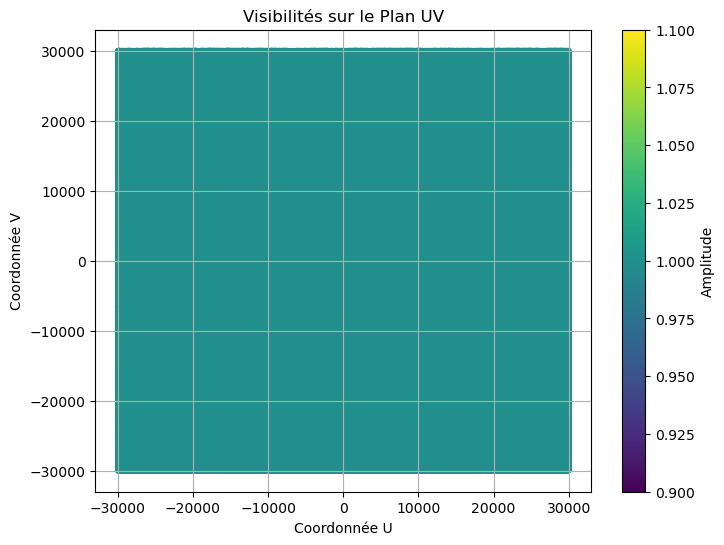

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
visibility_data = np.genfromtxt("dataflow/vis.csv", delimiter=' ', skip_header=1)

# Extraire les coordonnées u et v (ici j'utilise des colonnes fictives pour u et v, adaptez selon votre structure)
u_coord = visibility_data[:, 0]  # Première colonne : coordonnées u
v_coord = visibility_data[:, 1]  # Deuxième colonne : coordonnées v

# Extraire les parties réelle et imaginaire des visibilités
real_part = visibility_data[:, 3]  # 4e colonne : partie réelle
imag_part = visibility_data[:, 4]  # 5e colonne : partie imaginaire

# Calculer l'amplitude
amplitude = np.sqrt(real_part**2 + imag_part**2)

# Tracer les visibilités sur le plan UV
plt.figure(figsize=(8, 6))
plt.scatter(u_coord, v_coord, c=amplitude, cmap='viridis', s=10)  # Taille et couleur selon l'amplitude
plt.colorbar(label='Amplitude')  # Ajouter une barre de couleurs pour l'amplitude
plt.title("Visibilités sur le Plan UV")
plt.xlabel("Coordonnée U")
plt.ylabel("Coordonnée V")
plt.grid(True)
plt.show()


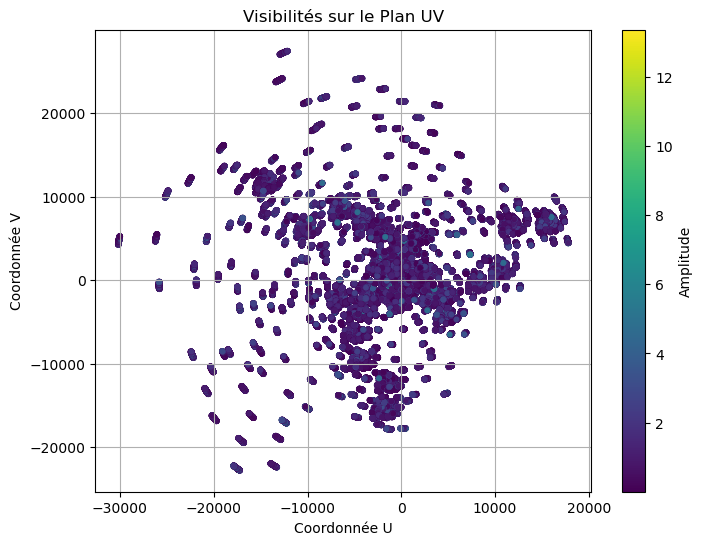

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
visibility_data = np.genfromtxt("example/GLEAM_small_visibilities_corrupted.csv", delimiter=' ', skip_header=1)

# Extraire les coordonnées u et v (ici j'utilise des colonnes fictives pour u et v, adaptez selon votre structure)
u_coord = visibility_data[:, 0]  # Première colonne : coordonnées u
v_coord = visibility_data[:, 1]  # Deuxième colonne : coordonnées v

# Extraire les parties réelle et imaginaire des visibilités
real_part = visibility_data[:, 3]  # 4e colonne : partie réelle
imag_part = visibility_data[:, 4]  # 5e colonne : partie imaginaire

# Calculer l'amplitude
amplitude = np.sqrt(real_part**2 + imag_part**2)

# Tracer les visibilités sur le plan UV
plt.figure(figsize=(8, 6))
plt.scatter(u_coord, v_coord, c=amplitude, cmap='viridis', s=10)  # Taille et couleur selon l'amplitude
plt.colorbar(label='Amplitude')  # Ajouter une barre de couleurs pour l'amplitude
plt.title("Visibilités sur le Plan UV")
plt.xlabel("Coordonnée U")
plt.ylabel("Coordonnée V")
plt.grid(True)
plt.show()
